In [1]:
import numpy as np
import pandas as pd
from stocktrends import Renko
import statsmodels.api as sm
from alpha_vantage.timeseries import TimeSeries
import copy

In [2]:
from KPI import *
from Technical_Indicators import *

[*********************100%***********************]  1 of 1 completed
imported
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
imported


In [3]:
key_path = 'C:\\Users\\Yiwen L\\Documents\\alg_t\\code\\key.txt'
ts = TimeSeries(key=open(key_path,'r').read(), output_format='pandas')

In [4]:
ts.get_intraday(symbol = 'MSFT', interval = '5min', outputsize = 'full')[0]

,1. open,2. high,3. low,4. close,5. volume
date,,,,,
2020-06-30 16:00:00,204.22,204.2300,201.370,203.460,2957591.0
2020-06-30 15:55:00,202.77,204.4000,202.770,204.220,1802476.0
2020-06-30 15:50:00,202.47,202.7900,202.380,202.790,591486.0
2020-06-30 15:45:00,202.41,202.5300,202.345,202.455,355698.0
2020-06-30 15:40:00,202.44,202.4563,202.260,202.410,298837.0
...,...,...,...,...,...
2020-06-11 09:55:00,193.52,194.1000,193.460,193.846,552265.0
2020-06-11 09:50:00,193.36,193.7000,192.950,193.540,567395.0
2020-06-11 09:45:00,192.58,193.4000,192.320,193.320,764458.0


In [5]:
tickers = ["MSFT","AAPL","FB","AMZN","INTC", "CSCO","IBM","LYFT"]
ohlc_intraday = {} # directory with ohlc value for each stock            
attempt = 0 # initializing passthrough variable
drop = [] # initializing list to store tickers whose close price was successfully extracted
while len(tickers) != 0 and attempt <=300:
    tickers = [j for j in tickers if j not in drop]
    for i in range(len(tickers)):
        try:
            ohlc_intraday[tickers[i]] = ts.get_intraday(symbol=tickers[i],interval='5min', outputsize='full')[0]
            ohlc_intraday[tickers[i]].columns = ["Open","High","Low","Adj Close","Volume"]
            drop.append(tickers[i])      
        except:
            print(tickers[i]," :failed to fetch data...retrying")
            continue
    attempt+=1

 
tickers = ohlc_intraday.keys()

INTC  :failed to fetch data...retrying
CSCO  :failed to fetch data...retrying
IBM  :failed to fetch data...retrying
LYFT  :failed to fetch data...retrying
INTC  :failed to fetch data...retrying
CSCO  :failed to fetch data...retrying
IBM  :failed to fetch data...retrying
LYFT  :failed to fetch data...retrying
INTC  :failed to fetch data...retrying
CSCO  :failed to fetch data...retrying
IBM  :failed to fetch data...retrying
LYFT  :failed to fetch data...retrying
INTC  :failed to fetch data...retrying
CSCO  :failed to fetch data...retrying
IBM  :failed to fetch data...retrying
LYFT  :failed to fetch data...retrying
INTC  :failed to fetch data...retrying
CSCO  :failed to fetch data...retrying
IBM  :failed to fetch data...retrying
LYFT  :failed to fetch data...retrying
INTC  :failed to fetch data...retrying
CSCO  :failed to fetch data...retrying
IBM  :failed to fetch data...retrying
LYFT  :failed to fetch data...retrying
INTC  :failed to fetch data...retrying
CSCO  :failed to fetch data...r

In [6]:
tickers

dict_keys(['MSFT', 'AAPL', 'FB', 'AMZN', 'INTC', 'CSCO', 'IBM', 'LYFT'])

In [7]:
ohlc_intraday['MSFT'].index

DatetimeIndex(['2020-06-30 16:00:00', '2020-06-30 15:55:00',
               '2020-06-30 15:50:00', '2020-06-30 15:45:00',
               '2020-06-30 15:40:00', '2020-06-30 15:35:00',
               '2020-06-30 15:30:00', '2020-06-30 15:25:00',
               '2020-06-30 15:20:00', '2020-06-30 15:15:00',
               ...
               '2020-06-11 10:20:00', '2020-06-11 10:15:00',
               '2020-06-11 10:10:00', '2020-06-11 10:05:00',
               '2020-06-11 10:00:00', '2020-06-11 09:55:00',
               '2020-06-11 09:50:00', '2020-06-11 09:45:00',
               '2020-06-11 09:40:00', '2020-06-11 09:35:00'],
              dtype='datetime64[ns]', name='date', length=1065, freq=None)

In [8]:
################################Backtesting####################################

#Merging renko df with original ohlc df
ohlc_renko = {}
df = copy.deepcopy(ohlc_intraday)
tickers_signal = {}
tickers_ret = {}
for ticker in tickers:
    print("merging for ",ticker)
    renko = renko_DF(df[ticker])
    renko.columns = ["Date","open","high","low","close","uptrend","bar_num"]
    df[ticker]["Date"] = df[ticker].index
    ohlc_renko[ticker] = df[ticker].merge(renko.loc[:,["Date","bar_num"]],how="outer",on="Date")
    ohlc_renko[ticker]["bar_num"].fillna(method='ffill',inplace=True)
    ohlc_renko[ticker]["obv"]= OBV(ohlc_renko[ticker])
    ohlc_renko[ticker]["obv_slope"]= slope(ohlc_renko[ticker]["obv"],5)
    tickers_signal[ticker] = ""
    tickers_ret[ticker] = []

merging for  MSFT


C:\Users\Yiwen L\Documents\alg_t\code\Technical_Indicators.py:375: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  renko_df["bar_num"][i]+=renko_df["bar_num"][i-1].copy()
C:\Users\Yiwen L\Documents\alg_t\code\Technical_Indicators.py:377: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  renko_df["bar_num"][i]+=renko_df["bar_num"][i-1].copy()
C:\Users\Yiwen L\Documents\alg_t\code\Technical_Indicators.py:386: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-

merging for  AAPL
merging for  FB
merging for  AMZN
merging for  INTC
merging for  CSCO
merging for  IBM
merging for  LYFT


In [9]:
#Identifying signals and calculating daily return
for ticker in tickers:
    print("calculating daily returns for ",ticker)
    for i in range(len(ohlc_intraday[ticker])):
        if tickers_signal[ticker] == "":
            tickers_ret[ticker].append(0)
            if ohlc_renko[ticker]["bar_num"][i]>=2 and ohlc_renko[ticker]["obv_slope"][i]>30:
                tickers_signal[ticker] = "Buy"
            elif ohlc_renko[ticker]["bar_num"][i]<=-2 and ohlc_renko[ticker]["obv_slope"][i]<-30:
                tickers_signal[ticker] = "Sell"
        
        elif tickers_signal[ticker] == "Buy":
            tickers_ret[ticker].append((ohlc_renko[ticker]["Adj Close"][i]/ohlc_renko[ticker]["Adj Close"][i-1])-1)
            if ohlc_renko[ticker]["bar_num"][i]<=-2 and ohlc_renko[ticker]["obv_slope"][i]<-30:
                tickers_signal[ticker] = "Sell"
            elif ohlc_renko[ticker]["bar_num"][i]<2:
                tickers_signal[ticker] = ""
                
        elif tickers_signal[ticker] == "Sell":
            tickers_ret[ticker].append((ohlc_renko[ticker]["Adj Close"][i-1]/ohlc_renko[ticker]["Adj Close"][i])-1)
            if ohlc_renko[ticker]["bar_num"][i]>=2 and ohlc_renko[ticker]["obv_slope"][i]>30:
                tickers_signal[ticker] = "Buy"
            elif ohlc_renko[ticker]["bar_num"][i]>-2:
                tickers_signal[ticker] = ""
    ohlc_renko[ticker]["ret"] = np.array(tickers_ret[ticker])


calculating daily returns for  MSFT
calculating daily returns for  AAPL
calculating daily returns for  FB
calculating daily returns for  AMZN
calculating daily returns for  INTC
calculating daily returns for  CSCO
calculating daily returns for  IBM
calculating daily returns for  LYFT


In [11]:

#calculating overall strategy's KPIs
strategy_df = pd.DataFrame()
for ticker in tickers:
    strategy_df[ticker] = ohlc_renko[ticker]["ret"]
strategy_df["ret"] = strategy_df.mean(axis=1)
CAGR_intraday(strategy_df)
sharpe_intraday(strategy_df,0.025)
max_dd_intraday(strategy_df)  

0.05611173562529074

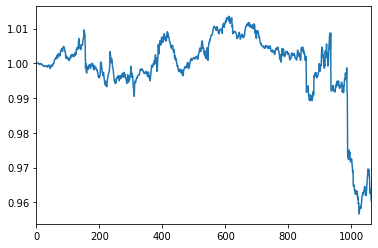

In [12]:

#visualizing strategy returns
(1+strategy_df["ret"]).cumprod().plot()


In [14]:
#calculating individual stock's KPIs
cagr = {}
sharpe_ratios = {}
max_drawdown = {}
for ticker in tickers:
    print("calculating KPIs for ",ticker)      
    cagr[ticker] =  CAGR_intraday(ohlc_renko[ticker])
    sharpe_ratios[ticker] =  sharpe_intraday(ohlc_renko[ticker],0.025)
    max_drawdown[ticker] =  max_dd_intraday(ohlc_renko[ticker])

KPI_df = pd.DataFrame([cagr,sharpe_ratios,max_drawdown],index=["Return","Sharpe Ratio","Max Drawdown"])      
KPI_df.T

calculating KPIs for  MSFT
calculating KPIs for  AAPL
calculating KPIs for  FB
calculating KPIs for  AMZN
calculating KPIs for  INTC
calculating KPIs for  CSCO
calculating KPIs for  IBM
calculating KPIs for  LYFT


,Return,Sharpe Ratio,Max Drawdown
MSFT,-0.387764,-1.642704,0.080827
AAPL,-0.111526,-0.531468,0.068383
FB,-0.579449,-1.738916,0.108727
AMZN,0.377774,1.446310,0.056629
INTC,-0.042443,-0.261741,0.074320
CSCO,-0.548353,-2.243594,0.086962
IBM,-0.695786,-2.753519,0.098781
LYFT,-0.884356,-1.504780,0.162243
